In [1]:
import sys
!{sys.executable} -m pip install pyarrow

You should consider upgrading via the '/Users/jeankeslernunes/Documents/FIAP/ClickPlus_Challenge_Sprint_4/.venv/bin/python -m pip install --upgrade pip' command.


Bloco 1: Importar bibliotecas e carregar os dados preparados para modelagem

In [2]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o arquivo Parquet com as features RFM
caminho_rfm = '../data/03_features/rfm_features.parquet' 
df_rfm = pd.read_parquet(caminho_rfm)

print("DataFrame RFM carregado com sucesso e pronto para a modelagem!")
display(df_rfm.head())

DataFrame RFM carregado com sucesso e pronto para a modelagem!


,Recencia,Frequencia,ValorMonetario
fk_contact,,,
0000029b76ad3cf9d86ad430754fb1d4478069affda61e8adaf4c57e9aa4b37b,1179,1,91.02
000010ae2e13049769982d9f07de792d92452ff1d124e3a49109fa57f6af54b8,698,1,82.48
0001018716456b2b34ca7a31f9b597974be6e1c9f6122a1bba5bb9c267a9e7fe,259,1,193.61
0002fdedbce706df9a2602a5e1286a904e4582264572e10b0988c607e84288f7,812,1,385.83
0003cb164c9b94826ccad40eaa46efc7bd2242d6c4625370a6609fcc1a263da4,96,1,116.22


Bloco 2: Normalizar os dados para que todas as features tenham a mesma escala


In [3]:
# Inicializando o normalizador
scaler = StandardScaler()

# Aplicando a normalização nos dados do df_rfm
df_rfm_scaled_array = scaler.fit_transform(df_rfm)

# Convertendo o array de volta para um DataFrame do Pandas para facilitar a visualização
df_rfm_scaled = pd.DataFrame(df_rfm_scaled_array, index=df_rfm.index, columns=df_rfm.columns)

print("Amostra dos dados após a normalização:")
display(df_rfm_scaled.head())

Amostra dos dados após a normalização:


,Recencia,Frequencia,ValorMonetario
fk_contact,,,
0000029b76ad3cf9d86ad430754fb1d4478069affda61e8adaf4c57e9aa4b37b,0.110903,-0.237002,-0.203417
000010ae2e13049769982d9f07de792d92452ff1d124e3a49109fa57f6af54b8,-0.433338,-0.237002,-0.211998
0001018716456b2b34ca7a31f9b597974be6e1c9f6122a1bba5bb9c267a9e7fe,-0.930057,-0.237002,-0.100334
0002fdedbce706df9a2602a5e1286a904e4582264572e10b0988c607e84288f7,-0.304350,-0.237002,0.092810
0003cb164c9b94826ccad40eaa46efc7bd2242d6c4625370a6609fcc1a263da4,-1.114488,-0.237002,-0.178096


Bloco 3: Encontrar o número ideal de clusters com o Método do Cotovelo

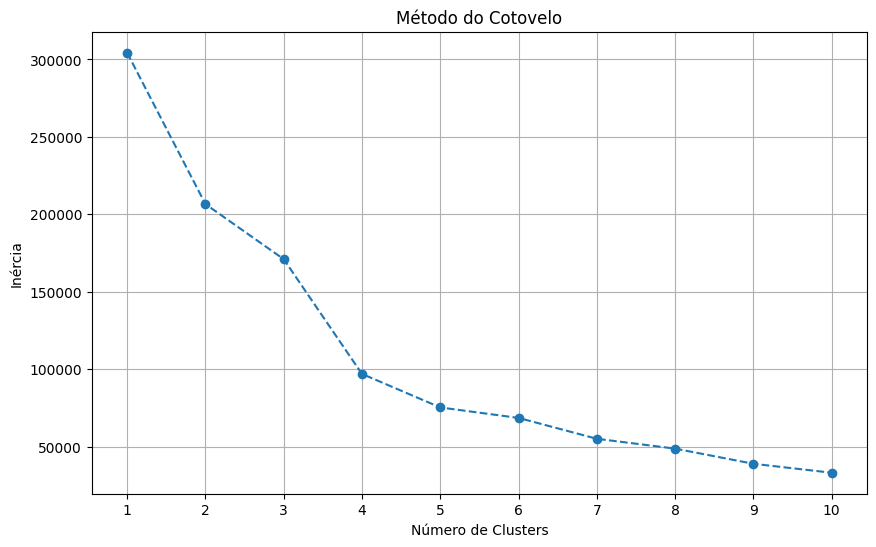

In [4]:
# Lista para guardar os valores de inércia (uma medida de quão compactos são os clusters)
inertia = []
range_n_clusters = range(1, 11) # Vamos testar de 1 a 10 clusters

for n_clusters in range_n_clusters:
    # Cria e treina o modelo K-Means para o número atual de clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(df_rfm_scaled)
    
    # Guarda a inércia do modelo treinado
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()


Bloco 4: Aplicar o K-Means com o número ideal de clusters


In [5]:
# Definindo o número de clusters com base na sua análise do gráfico
numero_ideal_clusters = 4

# Criando e treinando o modelo K-Means definitivo
kmeans = KMeans(n_clusters=numero_ideal_clusters, random_state=42, n_init='auto')
kmeans.fit(df_rfm_scaled) # Usamos os dados normalizados para treinar

# Adicionando uma nova coluna com o rótulo do cluster ao DataFrame RFM ORIGINAL
df_rfm['Cluster'] = kmeans.labels_

print("DataFrame RFM com os clientes devidamente clusterizados:")
display(df_rfm.head())

DataFrame RFM com os clientes devidamente clusterizados:


,Recencia,Frequencia,ValorMonetario,Cluster
fk_contact,,,,
0000029b76ad3cf9d86ad430754fb1d4478069affda61e8adaf4c57e9aa4b37b,1179,1,91.02,3
000010ae2e13049769982d9f07de792d92452ff1d124e3a49109fa57f6af54b8,698,1,82.48,3
0001018716456b2b34ca7a31f9b597974be6e1c9f6122a1bba5bb9c267a9e7fe,259,1,193.61,3
0002fdedbce706df9a2602a5e1286a904e4582264572e10b0988c607e84288f7,812,1,385.83,3
0003cb164c9b94826ccad40eaa46efc7bd2242d6c4625370a6609fcc1a263da4,96,1,116.22,3


# Bloco 5: Análise e Interpretação dos Clusters

In [6]:

# Agrupamos por 'Cluster' e calculamos as médias de RFM e a contagem de clientes
cluster_analysis = df_rfm.groupby('Cluster').agg(
    Recencia_Media=('Recencia', 'mean'),
    Frequencia_Media=('Frequencia', 'mean'),
    ValorMonetario_Medio=('ValorMonetario', 'mean'),
    Contagem_Clientes=('Recencia', 'count')
).round(2)

print("Análise dos Clusters:")
display(cluster_analysis)

Análise dos Clusters:


,Recencia_Media,Frequencia_Media,ValorMonetario_Medio,Contagem_Clientes
Cluster,,,,
0,2170.95,1.39,204.58,33062
1,367.51,21.55,3021.47,1151
2,197.00,347.40,110537.92,5
3,557.32,1.90,282.27,67240


Bloco Final: Mapear os clusters para os nomes das personas e salvar o arquivo final


In [7]:
import json

print("Carregando o mapeamento de aliases de clientes...")
with open('../data/02_processed/mapa_clientes_alias.json', 'r') as f:
    mapa_clientes = json.load(f)

# Criando o dicionário de mapeamento com os nomes das personas
mapeamento_clusters = {
    2: "Campeões",   
    0: "Fiéis",
    1: "Em Risco",  
    3: "Perdidos"       
}

# Criando a coluna 'segmento' com os nomes das personas
df_rfm['segmento'] = df_rfm['Cluster'].map(mapeamento_clusters)

# Preparando o DataFrame para salvar
df_final_customers = df_rfm.reset_index().rename(columns={'fk_contact': 'id_cliente'})

# Usando o mapa de aliases para criar a coluna de nome do cliente
df_final_customers['nome_cliente'] = df_final_customers['id_cliente'].map(mapa_clientes)

# Adicionando colunas de placeholder que serão preenchidas nos próximos notebooks
df_final_customers['prob_compra_7d'] = 0.0
df_final_customers['prob_compra_30d'] = 0.0
df_final_customers['sugestao_prox_trecho'] = "Aguardando recomendação"
df_final_customers['data_prox_viagem'] = "Aguardando previsão"

# Selecionando e ordenando as colunas
colunas_finais = [
    'id_cliente', 
    'nome_cliente', 
    'segmento',
    'prob_compra_7d',
    'prob_compra_30d', 
    'sugestao_prox_trecho', 
    'data_prox_viagem'
]
df_final_customers = df_final_customers[colunas_finais]

# Salvando o arquivo final
caminho_customers = '../data/04_output/customers.parquet'
df_final_customers.to_parquet(caminho_customers, index=False)

print(f"Arquivo final 'customers.parquet' criado com sucesso!")
display(df_final_customers.head())

Carregando o mapeamento de aliases de clientes...
Arquivo final 'customers.parquet' criado com sucesso!


,id_cliente,nome_cliente,segmento,prob_compra_7d,prob_compra_30d,sugestao_prox_trecho,data_prox_viagem
0,0000029b76ad3cf9d86ad430754fb1d4478069affda61e...,Sofia da Costa,Perdidos,0.0,0.0,Aguardando recomendação,Aguardando previsão
1,000010ae2e13049769982d9f07de792d92452ff1d124e3...,João Lucas Novais,Perdidos,0.0,0.0,Aguardando recomendação,Aguardando previsão
2,0001018716456b2b34ca7a31f9b597974be6e1c9f6122a...,Maria Fernanda Pastor,Perdidos,0.0,0.0,Aguardando recomendação,Aguardando previsão
3,0002fdedbce706df9a2602a5e1286a904e4582264572e1...,Hellena Campos,Perdidos,0.0,0.0,Aguardando recomendação,Aguardando previsão
4,0003cb164c9b94826ccad40eaa46efc7bd2242d6c46253...,Dra. Rafaela Aparecida,Perdidos,0.0,0.0,Aguardando recomendação,Aguardando previsão
